In [1]:
%matplotlib inline
from numpy import*
from pylab import*
import matplotlib.pyplot as plt
from h5py import File


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
from slab.dsfit import*
from slab import*
import json
from datetime import datetime
from scipy.optimize import curve_fit


def coherent_state(n, alpha):
    return exp(-abs(alpha)**2)*abs(alpha)**(2*n)/scipy.special.factorial(n)

def line(x, m, b):
    return m*x+b

def proportional(x, m):
    return m * x


FOLDER_PATH = "S:\\_Data\\200214 - 3DMM2 cooldown 10"


Warning serial library import failed.
Warning could not load Chase AWG dll, check that dll located at 'C:\_Lib\python\slab\instruments\awg\chase\dax22000_lib_DLL32.dll'


C:\Users\Tantalum\Anaconda3\lib\site-packages\IPython\qt.py:13: ShimWarning: The `IPython.qt` package has been deprecated since IPython 4.0. You should import from qtconsole instead.
  "You should import from qtconsole instead.", ShimWarning)


Could not load InstrumentManagerWindow
Warning could not load LDA labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\VNX_atten.dll'
Warning could not load LMS labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\vnx_fmsynth.dll'
Warning could not load LPS labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\VNX_dps.dll'
Could not load labbrick


In [2]:
def sincfunc_squared(p, x):
    '''p[0] + p[1] * sin(p[2]*(x-p[3])) / (p[2]*(x-p[3]))'''
    y = 0
    ii = 0
    y += p[3*ii+1] * np.sin(p[3*ii+2] * (x - p[3*ii+3])) / (p[3*ii+2] * (x - p[3*ii+3]))
    y += p[0]
    return y ** 2

def sincfunc_squared_sep(x, p0, p1, p2, p3):
    '''p[0] + p[1] * sin(p[2]*(x-p[3])) / (p[2]*(x-p[3]))'''
    y = 0
    ii = 0
    y += p1 * np.sin(p2 * (x - p3)) / (p2 * (x - p3))
    y += p0
    return y ** 2

def fitsincfunc_squared(xdata,ydata,fitparams=None,domain=None,showfit=False,
                   showstartfit=False,label="",debug=False):
    """returns [baseline,amplitude,sinc scale, offset]"""
    if domain is not None:
        fitdatax,fitdatay = selectdomain(xdata,ydata,domain)
    else:
        fitdatax=xdata
        fitdatay=ydata
    if fitparams is None:
        fitparams=0*ones(4)
        fitparams[0]=(fitdatay[0]+fitdatay[-1])/2.  # baseline
        fitparams[1]=max(fitdatay)-min(fitdatay)  # amplitude
        fitparams[2]=(max(fitdatax)-min(fitdatax))*300  # sinc scale
        fitparams[3]=fitdatax[np.argmax(fitdatay)] + 1e-8  # offset
    if debug==True: print(fitparams)
    p1 = fitgeneral(fitdatax, fitdatay, sincfunc_squared, fitparams, domain=None, showfit=showfit, 
                    showstartfit=showstartfit, label=label)
    p1[2]=abs(p1[2])
    return p1


def fitsincfunc_squared_curvefit(xdata,ydata,fitparams=None,domain=None,showfit=False,showstartfit=False,label="",
                        showlabel=False, showdata=True, mark_data='bo', mark_fit='r-'):
    """returns [baseline,amplitude,sinc scale, offset]"""
    if domain is not None:
        fitdatax,fitdatay = selectdomain(xdata,ydata,domain)
    else:
        fitdatax=xdata
        fitdatay=ydata
    if fitparams is None:
        fitparams=0*ones(4)
        fitparams[0]=(fitdatay[0]+fitdatay[-1])/2.  # baseline
        fitparams[1]=max(fitdatay)-min(fitdatay)  # amplitude
        fitparams[2]=(max(fitdatax)-min(fitdatax))*300  # sinc scale
        fitparams[3]=fitdatax[np.argmax(fitdatay)] + 1e-8  # offset
        
    sincfunc_squared_plot = lambda p, x: (p[0] + p[1] * np.sin(p[2] * (x - p[3])) / (p[2] * (x - p[3])))**2
    # decaysin3 = lambda p, x: p[0] * np.sin(2. * np.pi * p[1] * x + p[2] - np.pi / 2.) * np.e ** (
    # -1. * (x - fitdatax[0]) / p[3]) + p[4]
    #print "fitparams: ",fitparams
    popt, pcov = curve_fit(sincfunc_squared_sep, fitdatax, fitdatay, p0=fitparams)
    fitfunc = sincfunc_squared_plot
    bestfitparams = popt
    if showfit:
        if showlabel:
            if showdata:
                plt.plot(fitdatax,fitdatay,mark_data,label=label+" data")
            if showstartfit:
                plt.plot(fitdatax,fitfunc(startparams,fitdatax),label=label+" startfit")
            plt.plot(fitdatax,fitfunc(bestfitparams,fitdatax),mark_fit,label=label+" fit")
            if label!='': plt.legend()
        else:
            if showdata:
                plt.plot(fitdatax,fitdatay,mark_data)
            if showstartfit:
                plt.plot(fitdatax,fitfunc(startparams,fitdatax))
            plt.plot(fitdatax,fitfunc(bestfitparams,fitdatax),mark_fit)
            if label!='': plt.legend()
    return popt, pcov

# Picollo data folders

In [3]:
FOLDERS = [
    
"S:\_Data\200507 - Test Continous Monitoring Picollo",

"S:\_Data\200127 - Picollo cavity cooldown 17",
    
"S:\_Data\191209 - Picollo cavity cooldown 16",
    
"S:\_Data\191018 - Picollo cavity cooldown 15 real",

"S:\_Data\191010 - Picollo cavity cooldown 14 blockade expts",

"S:\_Data\190829 - Picollo cavity cooldown 14 BF3 - M8195A",

"S:\_Data\190819 - Picollo cavity cooldown 13 BF3 - M8195A",

"S:\_Data\190819 - Picollo cavity cooldown 13 BF3 -PXI only",

"S:\_Data\190805 - Picollo cavity cooldown 12 BF3",

"S:\_Data\190711 - Manipulate cavity cooldown 11 - cavity potted in eccosorb 6 - with JPA",

"S:\_Data\190614 - Manipulate cavity cooldown 10 - cavity potted in eccosorb 5",

"S:\_Data\190510 - Manipulate cavity cooldown 9 - cavity potted in eccosorb 4",

"S:\_Data\190423 - Manipulate cavity cooldown 8 - cavity potted in eccosorb 3",

"S:\_Data\190312 - Manipulate cavity cooldown 7 - cavity potted in eccosorb 2",

"S:\_Data\190128 - Manipulate cavity cooldown 6 - cavity potted in eccosorb",

"S:\_Data\181230 - Manipulate cavity cooldown 5 new circs",

"S:\_Data\181127 - Manipulate cavity cooldown 4 charge sidebands",

"S:\_Data\181003 - Manipulate cavity - Cooldown 3",

"S:\_Data\180828 - Manipulate cavity and 3D readout - Cooldown 2",

"S:\_Data\180815 - Manipulate cavity and 3D readout"]


In [4]:
FOLDERS

['S:\\_Data\x80507 - Test Continous Monitoring Picollo',
 'S:\\_Data\x80127 - Picollo cavity cooldown 17',
 'S:\\_Data\x0191209 - Picollo cavity cooldown 16',
 'S:\\_Data\x0191018 - Picollo cavity cooldown 15 real',
 'S:\\_Data\x0191010 - Picollo cavity cooldown 14 blockade expts',
 'S:\\_Data\x0190829 - Picollo cavity cooldown 14 BF3 - M8195A',
 'S:\\_Data\x0190819 - Picollo cavity cooldown 13 BF3 - M8195A',
 'S:\\_Data\x0190819 - Picollo cavity cooldown 13 BF3 -PXI only',
 'S:\\_Data\x0190805 - Picollo cavity cooldown 12 BF3',
 'S:\\_Data\x0190711 - Manipulate cavity cooldown 11 - cavity potted in eccosorb 6 - with JPA',
 'S:\\_Data\x0190614 - Manipulate cavity cooldown 10 - cavity potted in eccosorb 5',
 'S:\\_Data\x0190510 - Manipulate cavity cooldown 9 - cavity potted in eccosorb 4',
 'S:\\_Data\x0190423 - Manipulate cavity cooldown 8 - cavity potted in eccosorb 3',
 'S:\\_Data\x0190312 - Manipulate cavity cooldown 7 - cavity potted in eccosorb 2',
 'S:\\_Data\x0190128 - Manipulat

# Multimode data folders

In [5]:
FOLDERS_MM = [
    
    "200302 - 3DMM2 cooldown 10 - sideband with LO and mixer",
    
    "S:\\_Data\\200302 - 3DMM2 cooldown 10 - sideband with LO and mixer"
]

# Transmon coherence vs cooldown #

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


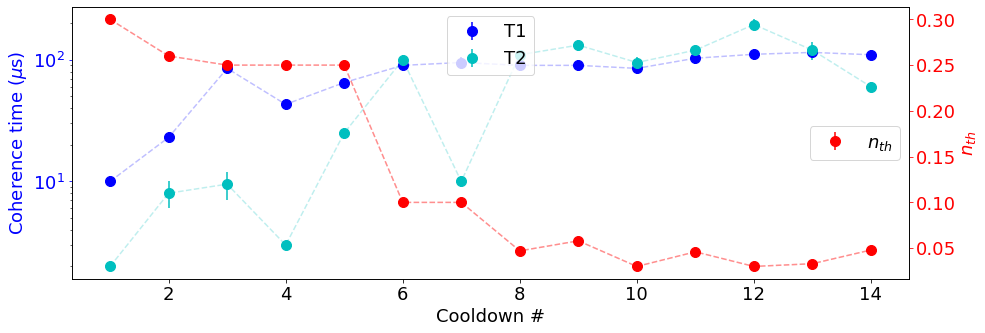

In [6]:
T1s = [10,23,85,43,65,90,95,90,90,85,103,111,115,110]
T1serr = [1.0,2.3,8.5,4.3,6.5, 9.0,5,9,9,8.5,10,10,10,10]
T2s = [2,8,7/2+12/2,3,25,100,10,110,132,95,120,195,120,60]
T2serr = [0,2,5/2.0,0,2.5,10,1,11,13.2,9.5,10,20,20,6]
nth = [0.3,0.26,0.25,0.25,0.25,0.1,0.1,0.047,0.058,0.03,0.046,0.03,0.033,0.048]
nth_err = []
fig = plt.figure(figsize=(15,5))
ax= fig.add_subplot(111)
ax.semilogy(arange(len(T1s))+1,T1s,'b--',alpha=0.25,markersize = 7)
ax.errorbar(arange(len(T1s))+1,T1s,yerr = 0.1*array(T1s),fmt = 'bo',markersize = 10,label='T1')
ax.plot(arange(len(T1s))+1,T2s,'c--',markersize = 7,alpha=0.25)
ax.errorbar(arange(len(T1s))+1,T2s,yerr = T2serr,fmt = 'co',markersize = 10,label='T2')
ax.set_ylabel('Coherence time ($\\mu$s)',color='b')
ax.tick_params('y', colors='b')

xlabel('Cooldown #')
ax2 = ax.twinx()
ax2.plot(arange(len(T1s))+1,nth,'r--',alpha = 0.25)
ax2.errorbar(arange(len(T1s))+1,nth,yerr = 0.00*array(nth),fmt = 'ro',markersize = 10,label='$n_{th}$')
ax2.plot(arange(len(T1s))+1,nth,'r--',alpha = 0.25)
ax2.set_ylabel('$n_{th}$', color='r')
ax2.tick_params('y', colors='r')
ax.legend(loc=9)
ax2.legend(loc=7)

In [130]:
array([10,23,85,43,65,90])*0.1

array([1. , 2.3, 8.5, 4.3, 6.5, 9. ])

[Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, 'MM')]

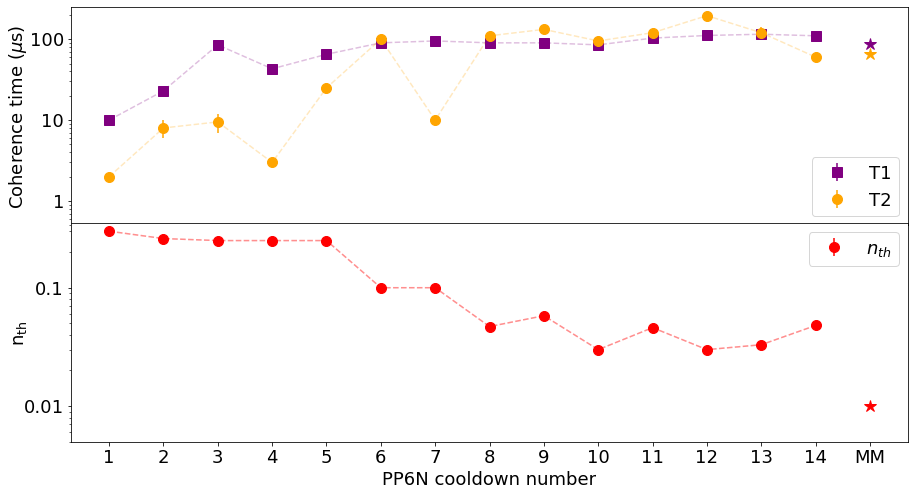

In [7]:
T1s = [10,23,85,43,65,90,95,90,90,85,103,111,115,110]
T1serr = [1.0,2.3,8.5,4.3,6.5, 9.0,5,9,9,8.5,10,10,10,10]
T2s = [2,8,7/2+12/2,3,25,100,10,110,132,95,120,195,120,60]
T2serr = [0,2,5/2.0,0,2.5,10,1,11,13.2,9.5,10,20,20,6]
nth = [0.3,0.26,0.25,0.25,0.25,0.1,0.1,0.047,0.058,0.03,0.046,0.03,0.033,0.048]
nth_err = []
fig,axs = plt.subplots(2,1,figsize=(15,8))
fig.subplots_adjust(wspace=0.0,hspace=-0.01)

# ax= fig.add_subplot(111)
ax = axs[0]
ax.semilogy(arange(len(T1s))+1,T1s,'--',color='purple',alpha=0.25,markersize = 7)
ax.errorbar(arange(len(T1s))+1,T1s,yerr = 0.1*array(T1s),fmt = 's',color = 'purple',markersize = 10,label='T1')
ax.plot(arange(len(T1s))+1,T2s,'--',color='orange',markersize = 7,alpha=0.25)
ax.errorbar(arange(len(T1s))+1,T2s,yerr = T2serr,fmt = 'o',color='orange',markersize = 10,label='T2')
ax.plot([15],86,'*',color = 'purple',markersize = 12)
ax.plot([15],65,'*',color = 'orange',markersize = 12)
ax.set_ylabel('Coherence time ($\\mu$s)')
ax.tick_params('y', colors='k')
ax.set_ylim(0.5,250)
ax.set_yticks([1,10,100])
ax.set_yticklabels(['1','10','100'])


ax2 = axs[1]
ax2.plot(arange(len(T1s))+1,nth,'r--',alpha = 0.25)
ax2.errorbar(arange(len(T1s))+1,nth,yerr = 0.00*array(nth),fmt = 'ro',markersize = 10,label='$n_{th}$')
ax2.plot(arange(len(T1s))+1,nth,'r--',alpha = 0.25)
ax2.semilogy([15],0.01,'r*',markersize = 12)
ax2.set_ylabel('$\\mathrm{n_{th}}$', color='k')
ax2.tick_params('y', colors='k')
ax2.set_ylim(0.005,0.35)
ax.legend(loc=4)
ax2.legend()
ax2.yaxis.set_label_coords(-0.05,0.5)
ax.yaxis.set_label_coords(-0.05,0.5)
ax.set_xticks(arange(1,len(T1s)+2))
ax2.set_xticks(arange(1,len(T1s)+2))
ax2.set_xlabel('PP6N cooldown number')
plt.savefig("Figures/SFig_Picollo_coherence.pdf",dpi = 400,bbox_inches='tight')
labs = [str(i) for i in range(1,15)]
labs.append('MM')
ax2.set_yticks([0.01,0.1])
ax2.set_yticklabels(['0.01','0.1'])

ax2.set_xticklabels(labs)